# EE 379K: Lab 7

## Rohan Nagar and Wenyang Fu

In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

%matplotlib inline

# Problem 1

This question should be answered using the `Carseats` data set.

In [66]:
carseats = pd.read_csv('Data/Carseats.csv')
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Part A

Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [71]:
carseats = carseats.replace(['Yes', 'No'], [1, 0])

regr = linear_model.LinearRegression()
regr.fit(carseats[['Price', 'Urban', 'US']], carseats['Sales'])

print('Coefficients: {}'.format(regr.coef_))

Coefficients: [-0.05445885 -0.02191615  1.2005727 ]


### Part B

Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!

### Answer



### Part C

Write out the model in equation form, being careful to handle the qualitative variables properly.

### Part D

For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?

### Part E

On the basis of your response to the previous quesion, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

### Part F

How well do the models in (a) and (e) fit the data?

### Part G

Using the model from (e), obtain 95% confidence intervals for the coefficients.

### Part H

Is there evidence of outliers or high leverage observations in the model from (e)?

# Problem 2

This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [3]:
boston = pd.read_csv('Data/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Part A

For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant associate between the predictor and the response? Create some plots to back up your assertions.

### Part B

Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

### Part C

How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the y-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

### Part D

Is there evidence of non-linear associate between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form

$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$$

# Problem 3

We will now try to predict per capita crime rate in the `Boston` data set.

### Part A

Try out some of the regression methods explored in this chapter, such as the best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

### Part B

Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross-validation, or some other reasonable alternative, as opposed to using training error.

### Part C

Does your chosen model involve all of the features in the data set? Why or why not?

# Problem 4

In this exercise, we will predict the number of applications recived using the other variables in the `College` data set.

In [3]:
college = pd.read_csv('Data/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Part A

Split the data set into a training set and a test set.

In [4]:
college = college.replace(['Yes', 'No'], [1, 0])

In [5]:
from sklearn.cross_validation import train_test_split

features = ['Private', 'Accept', 'Enroll', 'Top10perc', 'F.Undergrad',
            'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal',
            'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
X_train, X_test, Y_train, Y_test = train_test_split(college[features], college['Apps'], test_size=0.33, random_state=42)

### Part B

Fit a linear model using least squares on the training set, and report the test error obtained.

In [55]:
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, reg.predict(X_test))
print("Error on test data: {}".format(score))

Error on test data: 1793667.3647682874


### Part C

Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

In [56]:
ridge_reg = linear_model.RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
ridge_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, ridge_reg.predict(X_test))
print("Error on test data: {}".format(score))

Error on test data: 1790788.7928616544


### Part D

Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [57]:
lasso_reg = linear_model.LassoCV(alphas=[0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10])
lasso_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, lasso_reg.predict(X_test))
print("Error on test data: {}".format(score))

Error on test data: 1793660.7839995509


### Part E

Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(X_train)

# Show how much variance is explained
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  49.94,   87.47,   95.73,   97.5 ,   98.71,   99.45,   99.92,
         99.98,  100.01,  100.01,  100.01,  100.01,  100.01,  100.01,
        100.01,  100.01])

/Users/rohannagar/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


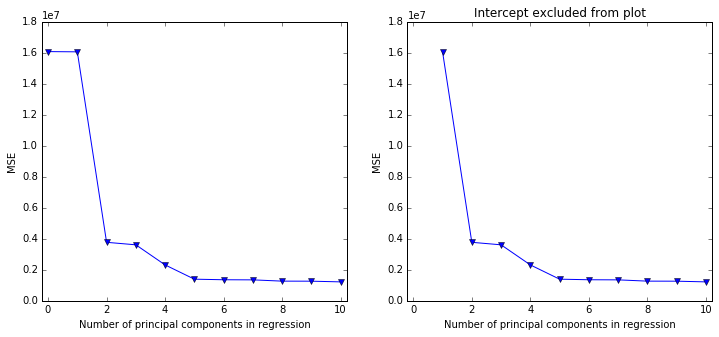

In [34]:
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=2)

# Use Linear Regression with increasing number of pricipal components
regr = linear_model.LinearRegression()
mse = []

# Without any components
score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), Y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()    
mse.append(score)

# Use 10 components adding one at a time
for i in np.arange(1,11):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], Y_train.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([1,2,3,4,5,6,7,8,9,10], mse[1:11], '-v')
ax2.set_title('Intercept excluded from plot')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,10.2))
    
fig.show()

In [66]:
# Let's use 5 components, gives us the best score with the least number of components.
pcr_regr = linear_model.LinearRegression()
pcr_regr.fit(X_reduced[:,:5], Y_train)

score = mean_squared_error(Y_test, ridge_reg.predict(X_test))
print('Error on test data: {}'.format(score))
print('Value of M selected by CV: 5')

Error on test data: 1790788.7928616544
Value of M selected by CV: 5


# Part F

Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [62]:
from sklearn.cross_decomposition import PLSRegression

params = {'n_components':[2, 3, 4, 5, 7, 10]}

pls = PLSRegression()
pls_reg = GridSearchCV(pls, params, scoring='mean_squared_error')
pls_reg.fit(X_train, Y_train)

score = mean_squared_error(Y_test, pls_reg.predict(X_test))
print("Error on test data: {}".format(score))
print("Value of M selected by CV: {}".format(pls_reg.best_params_['n_components']))

Error on test data: 10911489.731786955
Value of M selected by CV: 10


### Part G

Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

### Answer

After trying all 5 approaches, they seemed to result in very similar scores on the test data except for PLS, which did much worse. The best we did was a score of about $1790788$, which came from both Ridge Regression and PCR. This looks like the most accurate we can predict the number of college applications recieved. As stated earlier, all 5 models performed similarly save for PLS, which was much worse (about a factor of 5).

# Problem 5

Generate data of the form $y = X\beta + \epsilon$, where $X$ is a $n$ x $p$ matrix where $n = 51$, $p = 50$, and each $X_{ij}$ ~ $N(0,1)$. Also, generate the noise according to $\epsilon_i$ ~ $N(0, \frac{1}{4}$. Let $\beta$ be the all ones vector (for simplicity).

By repeatedly doing this experiment and generating fresh data (fresh $X$, $y$, and hence $\epsilon$), but keeping $\beta$ fixed, you will estimate many different solutions $\hat{\beta}$. Estimate the mean and variance of $\hat{\beta}$. Note that $\hat{\beta}$ is a vector, so for this exercise simply estimate the variance of a single component.

Choose regularization coefficients $\lambda = 0.01, 0.1, 1, 10, 100$ and repeat the above experiment. What do you observe? How do you explain this?